In [ ]:
##3 Observations##
# 1) There is less moisture in the cities around the equator, which can lead to why these cities are hotter
# 2) Due to less moisture in the atmosphere, there is less clouds in the sky for the cities near the equator. Since there are 
#    less clouds the sun is able to heat up the air more easily in equatorial cities
# 3) Windspeed starts to increase as we get into the higher latitudes in the northern hemisphere

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key
url="http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial&q=".format(api_key=api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=8b756e9fb02034b128acaca8637d0cea&units=Imperial&q=


In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

613

In [23]:
#Create buckets for data
lat = []
lon = []
temp = []
humidity = [] 
cloudiness = []
windspeed = []
cityname = []
date = []

#Set counters
count=0
set_count=1
#Loop through each city and append data to buckets
print("------------------------------\nData Retrieval Started\n------------------------------")
for city in cities:
    try: 
        response=requests.get(url + city.replace(" ", "")).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])                
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        cityname.append(response['name'])
        date.append(response['dt'])
        if count > 48:
            count = 1
            set_count += 1
        else:
            count += 1
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...")       
print("------------------------------\nData Retrieval Complete\n------------------------------")


------------------------------
Data Retrieval Started
------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | bonthe
Processing Record 2 of Set 1 | vaini
City not found. Skipping...
Processing Record 3 of Set 1 | carnarvon
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | abha
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 1 | santa cruz
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | lompoc
City not found. Skipping...
Processing Record 8 of Set 1 | albany
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 

Processing Record 16 of Set 4 | khatanga
Processing Record 17 of Set 4 | cayenne
Processing Record 18 of Set 4 | omsukchan
City not found. Skipping...
Processing Record 19 of Set 4 | jerantut
Processing Record 20 of Set 4 | ennis
Processing Record 21 of Set 4 | pizarro
Processing Record 22 of Set 4 | hami
Processing Record 23 of Set 4 | wuda
Processing Record 24 of Set 4 | nikolskoye
Processing Record 25 of Set 4 | manta
Processing Record 26 of Set 4 | quartucciu
Processing Record 27 of Set 4 | corinto
Processing Record 28 of Set 4 | aasiaat
City not found. Skipping...
Processing Record 29 of Set 4 | vostok
Processing Record 30 of Set 4 | lumphat
Processing Record 31 of Set 4 | hithadhoo
Processing Record 32 of Set 4 | tucuma
Processing Record 33 of Set 4 | puri
Processing Record 34 of Set 4 | hadejia
City not found. Skipping...
Processing Record 35 of Set 4 | ust-ishim
Processing Record 36 of Set 4 | tessalit
Processing Record 37 of Set 4 | mabaruma
City not found. Skipping...
Process

Processing Record 41 of Set 7 | ulladulla
City not found. Skipping...
Processing Record 42 of Set 7 | limon
Processing Record 43 of Set 7 | tagusao
Processing Record 44 of Set 7 | tautira
Processing Record 45 of Set 7 | ayagoz
Processing Record 46 of Set 7 | berdigestyakh
Processing Record 47 of Set 7 | mezen
Processing Record 48 of Set 7 | khromtau
Processing Record 49 of Set 7 | manihari
Processing Record 1 of Set 8 | kiunga
Processing Record 2 of Set 8 | baykit
Processing Record 3 of Set 8 | kirovsk
Processing Record 4 of Set 8 | prieska
Processing Record 5 of Set 8 | celestun
Processing Record 6 of Set 8 | tancanhuitz
Processing Record 7 of Set 8 | watertown
Processing Record 8 of Set 8 | vanimo
Processing Record 9 of Set 8 | nara
Processing Record 10 of Set 8 | qiongshan
Processing Record 11 of Set 8 | auchel
Processing Record 12 of Set 8 | flinders
City not found. Skipping...
Processing Record 13 of Set 8 | nemuro
Processing Record 14 of Set 8 | sinegorye
Processing Record 15 of 

In [24]:
#Create dataframe
weather_info = {"city":cityname,"latitude":lat,"longitude":lon,"date":date,"temperature": temp,"humidity":humidity,
                "cloudiness":cloudiness,"windspeed":windspeed}
cities_df = pd.DataFrame(weather_info)
cities_df

,city,latitude,longitude,date,temperature,humidity,cloudiness,windspeed
0,Bonthe,7.53,-12.51,1581459906,81.27,77,75,7.58
1,Vaini,-21.20,-175.20,1581459907,84.20,83,75,8.05
2,Carnarvon,-24.87,113.63,1581459907,77.00,78,90,8.05
3,Abha,18.22,42.51,1581459908,53.60,62,40,6.93
4,Santacruz,1.52,-77.26,1581459909,74.14,66,1,7.87
...,...,...,...,...,...,...,...,...
474,Hofn,64.25,-15.21,1581460043,31.68,56,100,15.88
475,Ugoofaaru,5.67,73.00,1581460043,83.05,70,83,22.62
476,Nadym,65.53,72.52,1581459845,11.05,95,77,13.58
477,Marquette,46.53,-87.63,1581460044,30.00,54,20,8.05


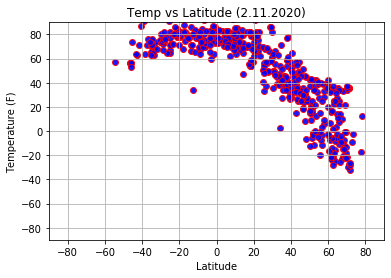

In [25]:
#Create scatter chart for temp vs latitude
import os
fig, ax = plt.subplots()
ax.scatter(cities_df["latitude"], cities_df["temperature"], marker="o", facecolors="blue", edgecolors="red", alpha=0.90)
ax.grid()
ax.set_ylim(-90, 90);
ax.set_xlim(-90, 90);
ax.set_title("Temp vs Latitude (2.11.2020)");
ax.set_xlabel("Latitude");
ax.set_ylabel("Temperature (F)");

# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Temp_Latitude.png")
path
fig.savefig(path)

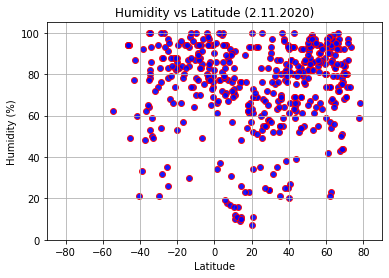

In [26]:
#Create scatter chart for humidity vs latitude
fig1, ax1 = plt.subplots()
ax1.scatter(cities_df["latitude"], cities_df["humidity"], marker="o", facecolors="blue", edgecolors="red", alpha=0.90)
ax1.grid()
ax1.set_ylim(0, 105);
ax1.set_xlim(-90, 90);
ax1.set_title("Humidity vs Latitude (2.11.2020)");
ax1.set_xlabel("Latitude");
ax1.set_ylabel("Humidity (%)");
# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Humidity_Lat.png")
path
fig.savefig(path)

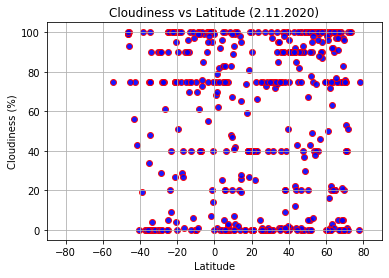

In [27]:
#Create scatter chart for cloudiness vs latitude
fig2, ax2 = plt.subplots()
ax2.scatter(cities_df["latitude"], cities_df["cloudiness"], marker="o", facecolors="blue", edgecolors="red", alpha=0.90)
ax2.grid()
ax2.set_ylim(-5, 105);
ax2.set_xlim(-90, 90);
ax2.set_title("Cloudiness vs Latitude (2.11.2020)");
ax2.set_xlabel("Latitude");
ax2.set_ylabel("Cloudiness (%)");
# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Cloudiness_Lat.png")
path
fig.savefig(path)

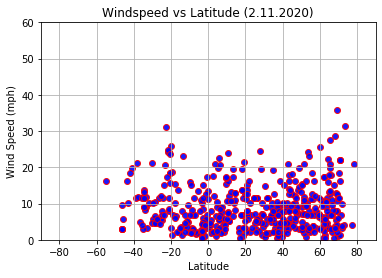

In [28]:
#Create scatter chart for windspeed vs latitude
fig3, ax3 = plt.subplots()
ax3.scatter(cities_df["latitude"], cities_df["windspeed"], marker="o", facecolors="blue", edgecolors="red", alpha=0.90)
ax3.grid()
ax3.set_ylim(0, 60);
ax3.set_xlim(-90, 90);
ax3.set_title("Windspeed vs Latitude (2.11.2020)");
ax3.set_xlabel("Latitude");
ax3.set_ylabel("Wind Speed (mph)");

# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Windspeed_Lat.png")
path
fig.savefig(path)